In [43]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pywt

## Упражнение 12.1
1. С помощью библиотеки OpenCV считайте изображение:

In [44]:
IMG_PATH = "data\\Task_5\\1.jpg"
image = cv2.imread(IMG_PATH)

2. Преобразуйте изображение в градации серого.

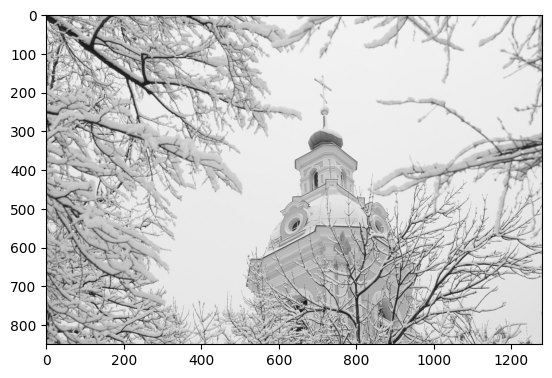

In [45]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

3. Выполните вейвлет-преобразование Хаара. Постройте гистограмму набора (фильтра) cA.

Введите максимальное значение функции h(n)
:

13098


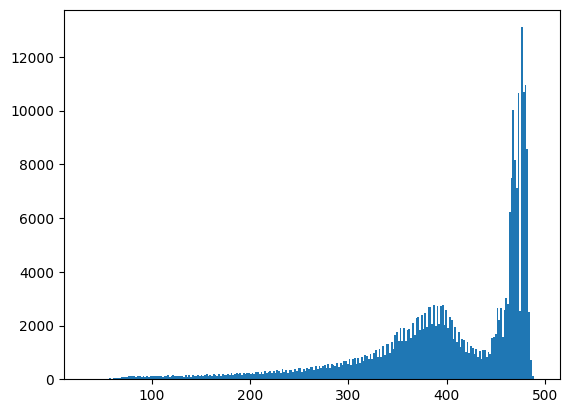

In [46]:
c = pywt.dwt2(image, 'haar')
cA, (cH, cV, cD) = c
hist = plt.hist(cA.ravel(), bins = 256)
print(int(hist[0].max()))

Какому набору (фильтру) соответствует изображение:

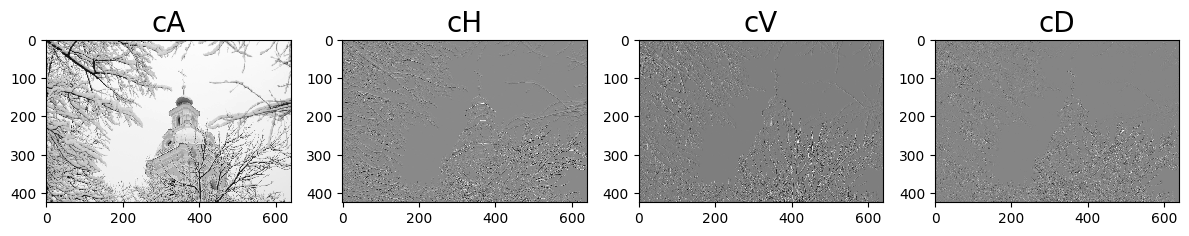

In [47]:
titles = ['cA', 'cH', 'cV', 'cD']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA, cH, cV, cD]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

## Упражнение 12.2
1. С помощью библиотеки OpenCV считайте изображение:

In [48]:
IMG_PATH_2 = "data\\Task_5\\2.jpg"
image_2 = cv2.imread(IMG_PATH_2)
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
image_2.shape

(720, 1280)

2. Выполните вейвлет-преобразование Хаара.

In [57]:
cA, _ = pywt.dwt2(image_2, 'haar')

3. Выполните повторное вейвлет-преобразование Хаара для набора cA.

In [58]:
c = pywt.dwt2(cA, 'haar')
cA1, (cH1, cV1, cD1) = c

4. Обнулите коэффициенты меньшие по модулю значения `threshold = 130` набора cA1.

Введите количество таких коэффициентов:

In [59]:
threshold = 130
h1 = cA1.shape[0]
zeros = 0
for i in range(h1):
    c[0][i][np.abs(c[0][i])<threshold] = 0.0
    zeros += len(c[0][i][np.abs(c[0][i])<threshold]) 
zeros

19647

5. Сохраните или отобразите полученное изображение. Должно получиться следующее изображение:

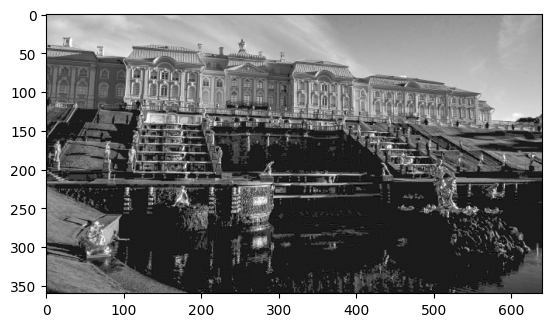

In [60]:
c_inverse1 = pywt.idwt2(c, 'haar')
plt.imshow(c_inverse1, cmap='gray')